#  Tutorial 4: Solving differential equations using the Runge-Kutta method

In this tutorial you will solve a differential equation for a non-linear oscillation using the Runge-Kutta method. The Runge-Kutta method is a general-purpose method to solve an ordinary differential equation (ODE) of the form $\frac{\mathrm{d}\mathbf{y}}{\mathrm{d}t} = \mathbf{f}(t,\mathbf{y})$, where $\mathbf{y}$ is a function of $t$ in this general example. The Runge Kutta method comes in different variants (we will work with the 4th order variant here), and is used for heavy number crunching. If you ever used a built-in ODE-solver, then chances are that a Runge Kutta algorithm was running behind the screens to solve your equation.

#### Problem statement:

Consider a mass on a spring (the spring leads to a restoring force $ -kx^{p-1}$ ), where the mass is moved around by an external force $F_{\mathrm{ext}}$ (i.e. a hand moving the mass). The system moves in one dimension only. See the image below:

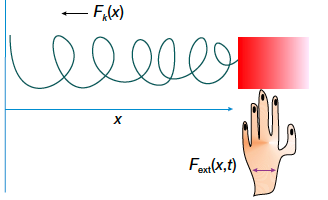

This process can be described using a differential equation that follows from the equation of motion:

$$ m\frac{\mathrm{d}^2x}{\mathrm{d}t^2}=F_{\mathrm{ext}}(x,t)-kx^{p-1}, $$

where the aim is to solve for the motion (i.e. the position and velocity) of the mass, given a choice for the exponent $p$ and an initial condition $x_0$. 
#### Approach:

You will solve the second-order ODE for the movement of the mass-spring system using the Runge-Kutta method. This approach comes with two ingredients:
1. To re-write the differential equation in the so-called 'dynamic form', and write a Python-function that is able to evaluate terms appearing in the dynamic form.
2. To write a Python function that applies the Runge-Kutta algorithm to the fourth order to solve the differential equation.

#### Preliminary reading and questions:

- Carefully read sections 8.2 to 8.6 and make sure that you know the answer to the following questions:
    1. Can you distinguish between differential equations of different order, ordinary vs. partial differential equations, and linear vs. nonlinear differential equations? (Section 8.3)
    2. How do initial conditions and boundary conditions differ, and how do the initial conditions between a first- and a second-order differential equation differ? (Section 8.3)
    3. What is the 'dynamic form'? **Can you re-write the differential equation of today's problems in the dynamic form?** (Section 8.4)
    4. How can you construct a simple algorithm for integrating a differential equation? Which error-types are often involved in such methods? (Sections 8.5,8.6)
    5. What is/are the main difference(s) between the Runge-Kutta method (any order) and the Euler method? Why do we generally choose the Runge-Kutta method over the Euler method? (section 8.6)   
- Revisit Tutorial B of the first week to refresh your knowledge on functions
- Revisit Tutorial C of the first week to refresh your knowledge on plotting


### Exercise 1: Defining the dynamic form of the differential equation



#### Programming tasks and questions:

1. Derive the dynamic form of the differential equation. Note that the **right-hand side** is not allowed to have any explicit derivatives, but the left-hand side does. Use the following definitions:

$$y^{(0)} \equiv x(t),$$

$$y^{(1)} \equiv \frac{\mathrm{d}x}{\mathrm{d}t} = \frac{\mathrm{d}y^{(0)}}{\mathrm{d}t} .$$

Think critically about the roles of $y^{(0)}$ and $y^{(1)}$: How can you express, using the above definitions, the second order differential equation that we want to solve in two first order differential equations? In other words, if $\frac{\mathrm{d}{y}^{(0)}}{\mathrm{d}t} = {f}^{(0)}$ and $\frac{\mathrm{d}{y}^{(1)}}{\mathrm{d}t}={f}^{(1)}$ hold, what do ${f}^{(0)}$ and ${f}^{(1)}$ represent? 

2. Build a function (define a logical name yourself) that returns a vector containing both terms in $\mathbf{f}$, given the inputs $\mathbf{y}$, $t$, and the spring constant $k$ and exponent $p$. See the next point for what to do with $F_{\mathrm{ex}}$.

3. You can write a separate function for $F_{\mathrm{ext}(x,t)}$, and have it return 0 exclusively for now (we will modify it later)

3. Test your function using some simple initial values for $y^{(0)}$ and $y^{(1)}$, and make sure that your output is a **numpy-array** and not a normal Python list (otherwise the Runge-Kutta method later on will not work). Print the output: does the function return the right shape, size and type of output as expected? If so, move on to the next part.

### Exercise 2: Implementing the Runge-Kutta method, fourth order

You have to calculate the following four terms **sequentially**:

$$\mathbf{k_1}=h\mathbf{f}(t_n,\mathbf{y_n}), $$

$$\mathbf{k_2}=h\mathbf{f}\big(t_n+\frac{h}{2},\mathbf{y_n}+\frac{\mathbf{k_1}}{2}\big),$$

$$\mathbf{k_3}=h\mathbf{f}\big(t_n+\frac{h}{2},\mathbf{y_n}+\frac{\mathbf{k_2}}{2}\big), $$

$$\mathbf{k_4}=h\mathbf{f}(t_n+h,\mathbf{y_n}+\mathbf{k_3}). $$

Essentially, the terms are approximations to the equation $\frac{\mathrm{d}\mathbf{y}}{\mathrm{d}t} = \mathbf{f}(t,\mathbf{y})$ evaluated at different points, which are then weighted to provide us with an updated value of $\mathbf{y}$:

$$\mathbf{y}_{n+1}=\mathbf{y}+\frac{1}{6}\cdot\big(\mathbf{k_1}+2\mathbf{k_2}+2\mathbf{k_3}+\mathbf{k_4}\big). $$

To give you an intuition of the meaning behind the different $\mathbf{k_i}$-terms, see the below figure:
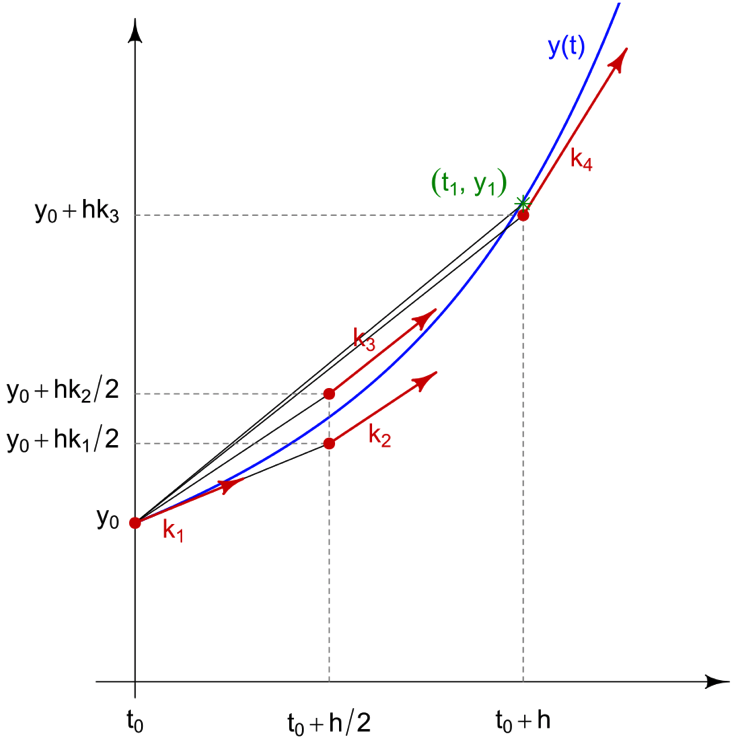



#### Programming steps:

_Note: However tempting it seems, don't try to re-use the code from the book: it is poorly written!_

1. Your function should be written as general as possible (that's why you had to define a separate function for your differential equation in the dynamic form). The function should take a dependent variable `y`, a time-value `t` (the independent variable), and a step size `h`  as inputs, and needs to return the next value of `y` (for a given time-value `t`). 
2. Calculate the values of $\mathbf{k_i}$ **sequentially**. Use calls to your function for calculating the right hand sides (i.e. $\mathbf{f}$). Make sure to assign the right dimensions to $\mathbf{k_i}$ (that is: if your input consists of $y^{(0)}$ and $y^{(1)}$, then $\mathbf{k_i}$ will also be a 1x2 vector!).
3. Have the function calculate $\mathbf{y_{n+1}}$ and return this value.
4. On to time evolution (use a separate code cell): Define a range of time-values from 0 to 10, discretized using the step size `h`. It is convenient to divide the time-range into `N` intervals, where each interval has a spacing of `h`. You are free to choose whether you use a `for` or a `while` construction for this
5. Define initial values for $x$ and $v$, and the vector $\mathbf{y}$ that contains the left hand sides of your system of first-order ODEs. Choose, for example, to set the initial velocity to 1, and the initial position to 0.
6. In your time-loop, update the value of $\mathbf{y}$ (use a numpy array!) on each step, and store the current $t$-value, $v$-value and $v$-value in numpy arrays (for example, via `x=np.append(x,y[0])`, if you use a 1x2 numpy-array `y` in your Rk4-method).
7. Make a plot of the position and velocity against time, using $k$=5, and $p$=2, and a sufficiently small step size for `h` (that is, divide your time-range into at 10 times as many intervals as time units).


#### Exercises

8. We used $F_{\mathrm{ext}}$=0, and set $p$ equal to 2. Based on our main differential equation, what behavior of the system (i.e. its position vs. time) would you expect? Do you observe this behavior? Does the relation between the velocity and the slope of the position hold?
9. What happens to the solution for either the position or the velocity if you reduce the amount of time-intervals (in other words: you increase step size $h$)? Try the following range of time intervals for the time-range from 0 to 100: [10,100,200,250,10000]. You can write a loop around your code to supply these different values (and retain the plotting command within the loop).
10. Choose a reasonable value for the discretization based on your result from the previous question. 
11. Using another loop construction (in a different code cell), investigate the effect of using different exponents $p$ and stiffnesses $k$ on the normal, undriven harmonic motion. Are there values for which the system becomes unstable, and if so, can you explain why this occurs? What is the effect of $k$ on the periodicity of the movement of the mass?
12. Now, we will change $F_{\mathrm{ext}}$ into a periodic driving motion. Make the function return $\sin{\omega{t}}$, where $\omega=\sqrt{\frac{k}{m}}$ (use a unity mass) makes $F_{\mathrm{ext}}$ dependent on $k$ (make the necessary additional edits to your code). What is the effect of a varying spring constant on the long-timescale behavior of the oscillation? Is there a way to prevent the system from going out of control?

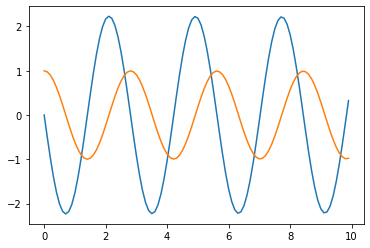

In [58]:
#bla
import math
import numpy as np
from matplotlib import pyplot as plt

def F_ext(t, x, k):
    return 0

def f(t,y,k,p):
    '''
    f(t,y,k,p): this returns the RHS of the rewritten form of our differential equation. 
    It assumes that the input is a 2x1 vector y
    These two differential equations will become:
    dy0(t)/dt= y1(t)
    dy1(t)/dt= 1 /m () F_ext - k*y0(t)**(p - 1)) (note m=1, so we leave it out)
    '''
    f1 = y[1]
    f2 = ( F_ext(t, y[0],k) - k*y[0]**(p-1) ) #F_ext is an external function that for now only returns 0. (and later on a sinus)
    return np.array([f1,f2])


def rk4(h, x0, f, k, p):
    '''
    This function contains the meat of the Rk4-method. You should apply
    the calculation of the four weights and the next iteration of the
    y-vector here. '''
    y = [np.array([1,x0])]
    for t in np.arange(h,10,h):
        
        k1 = h*f(t,y[-1],k,p)
        k2 = h*f(t+h/2,y[-1]+k1/2,k,p)
        k3 = h*f(t+h/2,y[-1]+k2/2,k,p)
        k4 = h*f(t+h,y[-1]+k2,k,p)

        y.append(y[-1]+(k1+2*k2+2*k3+k4)/6)


    return np.hstack((np.array(y), np.arange(0,10,h).reshape(len(y),1)))

data = rk4(0.1, 0, f, 5, 2)

t = data[:,2]
v = data[:,1]
x = data[:,0]

plt.plot(t,v)
plt.plot(t,x)


In [ ]:
#question 8,9,10

'''
EXAMPLE FOR VISUALIZATION:

You can use
fig, ax = plt.subplots(nrows=2, ncols=1,dpi=200)
fig.set_size_inches(11,4)
plt.tight_layout()

To set two non-overlapping, wide subfigures placed on top of each other.

You can call the different ax-childs of the plt.subplots function via:

ax[0].plot(t,x)
ax[0].set_whatever_property(value) (i.e. ylim, xlabel, etc.)

ax[1].plot(something,something) etc.

'''







